In [5]:
import os
import urllib.request
import pickle
import numpy as np
import cv2
import pandas as pd
from keras.models import Model, load_model

%matplotlib inline
import matplotlib
from matplotlib.pyplot import imshow
from glob import iglob

/Users/joonjung/miniconda3/envs/donkey/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(13442, 120, 160, 3)
(13442,)


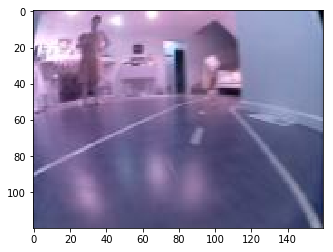

In [78]:
import re
import json

#dir_name = '/Users/joonjung/projects/donkeycar/data_process/tub_pi_one/'
#dir_name = '/Users/joonjung/projects/donkeycar/data_process/tub_pi_two/'
#dir_name = '/Users/joonjung/projects/donkeycar/data_process/tub_pi_three/'
dir_name = '/Users/joonjung/projects/donkeycar/data_process/tub_pi_one_merged/'
imgs = []
angles = []
for path in sorted(iglob(dir_name+'*.jpg')):
    rec = re.findall('\d+', path)
    #recnum = int(rec[0])
    #print(recnum)
    file = open(dir_name+"record_"+rec[0]+".json")
    data = json.load(file)
    steering = data["user/angle"]
    img = cv2.imread(path)
    imgs.append(img)
    angles.append(steering)
X = np.array(imgs)
Y = np.array(angles)
print(X.shape)
print(Y.shape)
imshow(X[0])

In [79]:
#shuffle  both X and Y the same way
def unison_shuffled_copies(X, Y):
    assert len(X) == len(Y)
    p = np.random.permutation(len(X))
    return X[p], Y[p]

shuffled_X, shuffled_Y = unison_shuffled_copies(X, Y)

len(shuffled_X)

13442

In [85]:
test_cutoff = int(len(X) * .8) # 80% of data used for training
val_cutoff = test_cutoff + int(len(Y) * .1) # 10% of data used for validation and test data 

train_X, train_Y = shuffled_X[:test_cutoff], shuffled_Y[:test_cutoff]
val_X, val_Y = shuffled_X[test_cutoff:val_cutoff], shuffled_Y[test_cutoff:val_cutoff]
test_X, test_Y = shuffled_X[val_cutoff:], shuffled_Y[val_cutoff:]

len(train_X) + len(val_X) + len(test_X)
#print(len(test_X))

13442

In [86]:
#model_path = '/Users/joonjung/mycar/models/pi_one' # pi one
#model_path = '/Users/joonjung/mycar/models/pi_two' # pi two
#model_path = '/Users/joonjung/mycar/models/pi_three' # pi two
model_path = '/Users/joonjung/mycar/models/pi_one_merged' # pi two
model = load_model(model_path)
test_P = model.predict(test_X)
#print(test_P)
test_P = np.array(test_P[0])
test_P = test_P.reshape((test_P.shape[0],)) 

In [87]:
print(test_P.shape)
print(test_Y.shape)

(1345,)
(1345,)


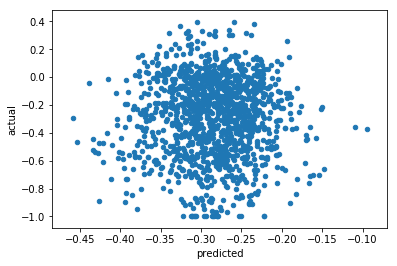

In [88]:
df = pd.DataFrame({'predicted':test_P, 'actual':test_Y})
ax = df.plot.scatter('predicted', 'actual')
#ax.set_ylabel("steering angle")

Text(0, 0.5, 'steering angle')

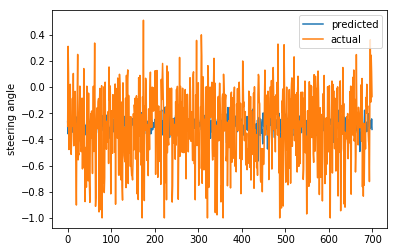

In [89]:
P = model.predict(X[:700])
#predict outputs nested arrays so we need to reshape to plot.
P = np.array(P[0])
P = P.reshape((P.shape[0],)) 

ax = pd.DataFrame({'predicted':P, 'actual':Y[:700]}).plot()
ax.set_ylabel("steering angle")